In [1]:
import csv
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
import pandas_datareader.data as web
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests
from matplotlib import pyplot
import scipy.stats
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.ar_model import AR
%matplotlib inline

In [40]:
fpath = 'facebook_data_Forbes_comments_sentiment_4dict.tsv'
post_data = pd.read_csv(fpath, sep='\t')
post_data.head()

,ID,PostID,PostDate,CommentID,CommentDate,CommenterURL,CommentText,WNPositive,WNNegative,WNNeutral,...,HVTokenQnt,HVSentiAvg,LMPositive,LMNegative,LMTokenQnt,LMSentiAvg,Vader_Positive,Vader_Negative,Vader_Neutral,Vader_Compound
0,0,1.015957e+16,2021-05-15 16:33:00,10159570570252509,NaN,elliottdotorg?fref=nf&rc=p&refid=52&__tn__=R,Here's a related story: https:// www.forbes.co...,0.00,0.00,4.00,...,16,0.000000,0,0,16,0.000000,0.000,0.0,1.000,0.0000
1,1,1.015957e+16,2021-05-15 16:33:00,10159570304792509,NaN,savvyedition/?rc=p&refid=52&__tn__=%7ER,this is an industry with alot of opportunities,0.50,0.00,1.50,...,3,0.666667,1,0,3,0.333333,0.271,0.0,0.729,0.3818
2,2,1.015957e+16,2021-05-15 16:33:00,10159576865892509,NaN,andre.spruill.75?fref=nf&rc=p&refid=52&__tn__=R,"If you like business, then you should know the...",0.25,0.25,11.50,...,12,0.500000,1,0,12,0.083333,0.164,0.0,0.836,0.6486
3,3,1.015957e+16,2021-05-15 16:33:00,10159570836362509,NaN,mike.crisp.52?fref=nf&rc=p&refid=52&__tn__=R,''How to outsmart the crowds ?'' easy ; stay a...,0.00,0.00,2.00,...,5,0.400000,1,0,5,0.200000,0.244,0.0,0.756,0.4404
4,4,1.015957e+16,2021-05-15 16:33:00,10159572385247509,NaN,robert.grubb.7583?fref=nf&rc=p&refid=52&__tn__=R,Entertainment music news link .. Check out Hig...,2.00,1.25,30.75,...,30,0.166667,1,0,30,0.033333,0.121,0.0,0.879,0.8442


In [41]:
post_data['Vader_Average'] = post_data['Vader_Positive'] - post_data['Vader_Negative']

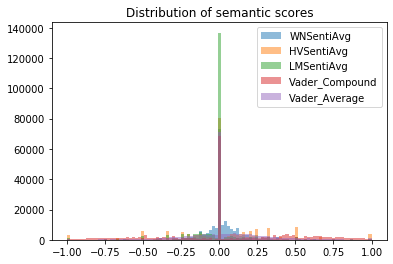

In [42]:
bins = np.linspace(-1, 1, 100)
pyplot.hist(post_data['WNSentiAvg'], bins, alpha=0.5, label='WNSentiAvg')
pyplot.hist(post_data['HVSentiAvg'], bins, alpha=0.5, label='HVSentiAvg')
pyplot.hist(post_data['LMSentiAvg'], bins, alpha=0.5, label='LMSentiAvg')
pyplot.hist(post_data['Vader_Compound'], bins, alpha=0.5, label='Vader_Compound')
pyplot.hist(post_data['Vader_Positive'] - post_data['Vader_Negative'], bins, alpha=0.5, label='Vader_Average')
pyplot.legend(loc='upper right')
pyplot.title('Distribution of semantic scores')
pyplot.show()

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

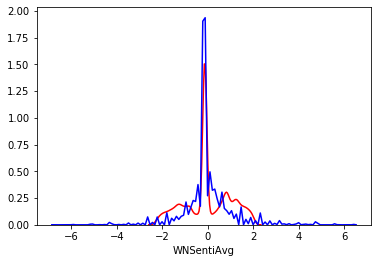

In [43]:


# seaborn histogram
sns.distplot((post_data['Vader_Compound'] - post_data['Vader_Compound'].mean())/post_data['Vader_Compound'].std(), hist=False, kde=True, 
             bins=int(180/5), color = 'red',
             hist_kws={'edgecolor':'black'})
sns.distplot((post_data['WNSentiAvg'] - post_data['WNSentiAvg'].mean())/post_data['WNSentiAvg'].std(), hist=False, kde=True, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
sns.distplot((post_data['LMSentiAvg'] - post_data['LMSentiAvg'].mean())/post_data['LMSentiAvg'].std(), hist=False, kde=True, 
             bins=int(180/5), color = 'green',
             hist_kws={'edgecolor':'black'})
sns.distplot((post_data['HVSentiAvg'] - post_data['HVSentiAvg'].mean())/post_data['HVSentiAvg'].std(), hist=False, kde=True, 
             bins=int(180/5), color = 'orange',
             hist_kws={'edgecolor':'black'})
sns.distplot((post_data['Vader_Average'] - post_data['Vader_Average'].mean())/post_data['Vader_Average'].std(), hist=False, kde=True, 
             bins=int(180/5), color = 'purple',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Distribution of Sentiment Score')
plt.xlabel('Score')
plt.ylabel('Posts')

In [ ]:
post_data[['WNSentiAvg','HVSentiAvg','LMSentiAvg','Vader_Compound','Vader_Average']].describe()

In [ ]:
post_data['PostDate'] = pd.to_datetime(post_data['PostDate'], errors='coerce')

post_data['DateMonth'] = post_data['PostDate'].dt.strftime('%Y-%m')
post_data['DateDay'] = post_data['PostDate'].dt.strftime('%Y-%m-%d')

In [ ]:
post_data['DateMonth'].head()

In [ ]:
post_data.columns

In [ ]:
Monthly_Data = post_data.groupby('DateMonth').agg({'WNSentiAvg': 'sum'
                                                         ,'WNTokenQnt':'count'
                                                        ,'Vader_Compound':'mean'
                                                        ,'Vader_Average': 'mean'
                                                        ,'HVPositive':'sum'
                                                        ,'HVNegative':'sum'
                                                        ,'HVTokenQnt':'sum'
                                                        ,'LMPositive':'sum'
                                                        ,'LMNegative':'sum'
                                                        ,'LMTokenQnt':'sum'
                                                       })

In [ ]:
DailyData = post_data.groupby('DateDay').agg({'WNSentiAvg': 'sum'
                                                        ,'WNTokenQnt':'count'
                                                        ,'Vader_Compound':'mean'
                                                        ,'Vader_Average': 'mean'
                                                        ,'HVPositive':'sum'
                                                        ,'HVNegative':'sum'
                                                        ,'HVTokenQnt':'sum'
                                                        ,'LMPositive':'sum'
                                                        ,'LMNegative':'sum'
                                                        ,'LMTokenQnt':'sum'
                                                        })

In [ ]:
DailyData['WNSentiment'] =  DailyData['WNSentiAvg']/ DailyData['WNTokenQnt']
DailyData['HVSentiment'] = (DailyData['HVPositive'] - DailyData['HVNegative'])/DailyData['HVTokenQnt']
DailyData['LMSentiment'] = (DailyData['LMPositive'] - DailyData['LMNegative'])/DailyData['LMTokenQnt']

Monthly_Data['WNSentiment'] =  Monthly_Data['WNSentiAvg']/ Monthly_Data['WNTokenQnt']
Monthly_Data['HVSentiment'] = (Monthly_Data['HVPositive'] - Monthly_Data['HVNegative'])/Monthly_Data['HVTokenQnt']
Monthly_Data['LMSentiment'] = (Monthly_Data['LMPositive'] - Monthly_Data['LMNegative'])/Monthly_Data['LMTokenQnt']



In [44]:
print('Results of Dickey-Fuller Test:')
dftest = adfuller(DailyData['WNSentiment'].dropna(), autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
for i in range(len(dfoutput)):
    dfoutput[i] = round(dfoutput[i],4)
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                   -8.3639
p-value                           0.0000
#Lags Used                       16.0000
Number of Observations Used    2051.0000
Critical Value (1%)              -3.4335
Critical Value (5%)              -2.8630
Critical Value (10%)             -2.5675
dtype: float64


In [45]:
print('Results of Dickey-Fuller Test:')
dftest = adfuller(DailyData['HVSentiment'].dropna(), autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
for i in range(len(dfoutput)):
    dfoutput[i] = round(dfoutput[i],4)
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                   -5.2316
p-value                           0.0000
#Lags Used                       22.0000
Number of Observations Used    2045.0000
Critical Value (1%)              -3.4336
Critical Value (5%)              -2.8630
Critical Value (10%)             -2.5675
dtype: float64


In [46]:
for i in range(len(dfoutput)):
    dfoutput[i] = round(dfoutput[i],4)
print(dfoutput)
print('Results of Dickey-Fuller Test:')
dftest = adfuller(DailyData['LMSentiment'].dropna(), autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value


Test Statistic                   -5.2316
p-value                           0.0000
#Lags Used                       22.0000
Number of Observations Used    2045.0000
Critical Value (1%)              -3.4336
Critical Value (5%)              -2.8630
Critical Value (10%)             -2.5675
dtype: float64
Results of Dickey-Fuller Test:


In [47]:
for i in range(len(dfoutput)):
    dfoutput[i] = round(dfoutput[i],4)
print(dfoutput)
print('Results of Dickey-Fuller Test:')
dftest = adfuller(DailyData['Vader_Compound'].dropna(), autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value


Test Statistic                   -4.8363
p-value                           0.0000
#Lags Used                       22.0000
Number of Observations Used    2045.0000
Critical Value (1%)              -3.4336
Critical Value (5%)              -2.8630
Critical Value (10%)             -2.5675
dtype: float64
Results of Dickey-Fuller Test:


In [48]:
DailyData.head()

,WNSentiAvg,WNTokenQnt,Vader_Compound,Vader_Average,HVPositive,HVNegative,HVTokenQnt,LMPositive,LMNegative,LMTokenQnt,WNSentiment,HVSentiment,LMSentiment
DateDay,,,,,,,,,,,,,
2011-07-26,2.397785,68,0.027710,0.032676,121,96,625,13,32,625,0.035262,0.040000,-0.030400
2011-07-27,3.081498,71,0.131928,0.064408,90,55,426,13,21,426,0.043401,0.082160,-0.018779
2011-07-28,1.904804,102,0.047419,0.044549,178,142,986,30,51,986,0.018675,0.036511,-0.021298
2011-07-29,2.450146,40,0.213970,0.191775,64,39,286,15,14,286,0.061254,0.087413,0.003497
2011-07-31,-0.329145,12,-0.072400,-0.010250,82,66,400,6,28,400,-0.027429,0.040000,-0.055000


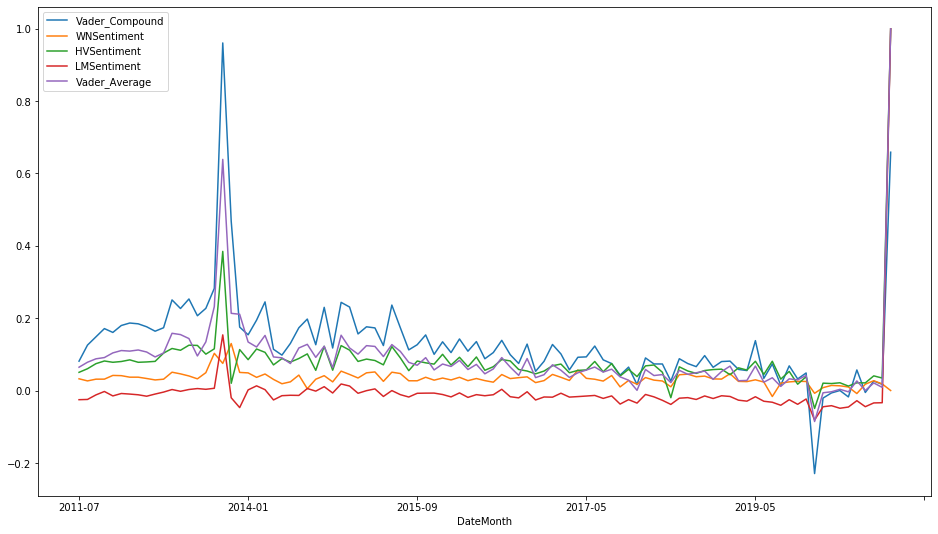

In [49]:
Monthly_Data[['Vader_Compound','WNSentiment','HVSentiment','LMSentiment','Vader_Average']].plot(legend=True, figsize=(16,9))

## Download S&P from Yahoo

In [19]:
SnP_daily = web.get_data_yahoo('^GSPC','10/01/2010','05/01/2021',interval='d')
SnP_monthly = web.get_data_yahoo('^GSPC','10/01/2010','05/01/2021',interval='m')

In [20]:
SnP_daily['LogReturn'] = np.log(SnP_daily['Adj Close']/SnP_daily['Adj Close'].shift(1))

In [21]:
SnP_monthly.index = SnP_monthly.index.strftime('%Y-%m')

In [22]:
SnP_monthly['LogReturn'] = np.log(SnP_monthly['Adj Close']/SnP_monthly['Adj Close'].shift(1))

## Granger test

In [50]:
Granger_data_daily = pd.merge(SnP_daily,DailyData, how= 'inner', left_index=True, right_index=True)

In [51]:
def grangerTest(exog, endog):
    MAX_LAG = 30
    ARaic = AR(exog.tolist()).fit(maxlag=MAX_LAG, ic="aic")
    ARbic = AR(exog.tolist()).fit(maxlag=MAX_LAG, ic="bic")
    # select the fewer number of parameters between both criteria.
    numExog = len(ARaic.params) if len(ARaic.params) < len(ARbic.params) else len(ARbic.params)

    print ("Optimal number of lags for exog data is " + str(numExog))

    ARaic = AR(endog.tolist()).fit(maxlag=MAX_LAG, ic="aic")
    ARbic = AR(endog.tolist()).fit(maxlag=MAX_LAG, ic="bic")
    # select the fewer number of parameters between both criteria.
    numEndog = len(ARaic.params) if len(ARaic.params) < len(ARbic.params) else len(ARbic.params)

    print ("Optimal number of lags for endog data is " + str(numEndog))

    # now that I know the optimal number of parameters, I can call the
    # granger causality function of statsmodels.
    data = pd.concat([endog, exog], axis=1)
    print ("\nGranger causality results of indep onto dep")
    results = grangercausalitytests(data, maxlag=numEndog)

    data = pd.concat([exog, endog], axis=1)
    print ("\nGranger causality results of dep onto indep")
    results = grangercausalitytests(data, maxlag=numExog)
    regr = results[2][1]
    print (regr[0].params)
    print (regr[1].params)
    print (regr[1].pvalues)

In [52]:
Granger_data_monthly = pd.merge(SnP_monthly,Monthly_Data, how= 'inner', left_index=True, right_index=True)

In [53]:
#Granger_data['SS_LogReturn'] = np.log((Granger_data['SentimentScoreAdj']+1)/(Granger_data['SentimentScoreAdj']+1).shift(1))

In [54]:
Granger_data_monthly

,High,Low,Open,Close,Volume,Adj Close,LogReturn,WNSentiAvg,WNTokenQnt,Vader_Compound,Vader_Average,HVPositive,HVNegative,HVTokenQnt,LMPositive,LMNegative,LMTokenQnt,WNSentiment,HVSentiment,LMSentiment
2011-07,1356.479980,1282.859985,1320.640015,1292.280029,81102170000,1292.280029,-0.021708,9.505089,293,0.081153,0.064461,535,398,2723,77,146,2723,0.032441,0.050312,-0.025340
2011-08,1307.380005,1101.540039,1292.589966,1218.890015,108419170000,1218.890015,-0.058468,59.766607,2246,0.125583,0.078203,3688,2496,19785,547,1035,19785,0.026610,0.060248,-0.024665
2011-09,1229.290039,1114.219971,1219.119995,1131.420044,102786820000,1131.420044,-0.074467,45.209593,1440,0.148399,0.087655,2309,1442,11679,393,534,11679,0.031396,0.074236,-0.012073
2011-10,1292.660034,1074.770020,1131.209961,1253.300049,98063670000,1253.300049,0.102307,53.990989,1715,0.171204,0.091138,3208,1933,15614,611,652,15614,0.031482,0.081657,-0.002626
2011-11,1277.550049,1158.660034,1251.000000,1246.959961,84275050000,1246.959961,-0.005072,73.772068,1766,0.160614,0.104040,3255,1974,16403,599,844,16403,0.041774,0.078095,-0.014936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12,3760.199951,3633.399902,3645.870117,3756.070068,96056410000,3756.070068,0.036449,147.620618,15204,-0.017646,-0.003622,24856,23123,140946,3205,9636,140946,0.009709,0.012295,-0.045627
2021-01,3870.899902,3662.709961,3764.610107,3714.239990,105548790000,3714.239990,-0.011199,-0.759993,91,0.056889,0.026549,123,107,748,26,47,748,-0.008352,0.021390,-0.028075
2021-03,3994.409912,3723.340088,3842.510010,3972.889893,120863560000,3972.889893,0.041563,248.952751,14230,-0.005448,0.000122,22428,19695,129537,2745,8532,129537,0.017495,0.021098,-0.044674
2021-04,4218.779785,3992.780029,3992.780029,4181.169922,82869290000,4181.169922,0.051097,31.289009,1155,0.026176,0.020961,1733,1331,9919,195,535,9919,0.027090,0.040528,-0.034278


In [55]:
Vars = ["Vader_Compound","Vader_Average","WNSentiment","HVSentiment","LMSentiment"]
for Var in Vars:
    print("\n" + Var + "\n")
    grangerTest(Granger_data_daily[Var], Granger_data_daily['LogReturn'])


Vader_Compound

Optimal number of lags for exog data is 10


C:\Users\Windows\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


Optimal number of lags for endog data is 2

Granger causality results of indep onto dep

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0423  , p=0.8372  , df_denom=1427, df_num=1
ssr based chi2 test:   chi2=0.0423  , p=0.8370  , df=1
likelihood ratio test: chi2=0.0423  , p=0.8370  , df=1
parameter F test:         F=0.0423  , p=0.8372  , df_denom=1427, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.2424  , p=0.7848  , df_denom=1424, df_num=2
ssr based chi2 test:   chi2=0.4865  , p=0.7841  , df=2
likelihood ratio test: chi2=0.4865  , p=0.7841  , df=2
parameter F test:         F=0.2424  , p=0.7848  , df_denom=1424, df_num=2

Granger causality results of dep onto indep

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1432  , p=0.7052  , df_denom=1427, df_num=1
ssr based chi2 test:   chi2=0.1435  , p=0.7049  , df=1
likelihood ratio test: chi2=0.1435  , p=0.7049  , df=1
parameter F test:         F=0

Optimal number of lags for exog data is 3
Optimal number of lags for endog data is 2

Granger causality results of indep onto dep

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2173  , p=0.6412  , df_denom=1427, df_num=1
ssr based chi2 test:   chi2=0.2178  , p=0.6407  , df=1
likelihood ratio test: chi2=0.2178  , p=0.6407  , df=1
parameter F test:         F=0.2173  , p=0.6412  , df_denom=1427, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4635  , p=0.6292  , df_denom=1424, df_num=2
ssr based chi2 test:   chi2=0.9302  , p=0.6281  , df=2
likelihood ratio test: chi2=0.9299  , p=0.6282  , df=2
parameter F test:         F=0.4635  , p=0.6292  , df_denom=1424, df_num=2

Granger causality results of dep onto indep

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5164  , p=0.4725  , df_denom=1427, df_num=1
ssr based chi2 test:   chi2=0.5175  , p=0.4719  , df=1
likelihood ratio test: chi2=0.5174  , p=0.

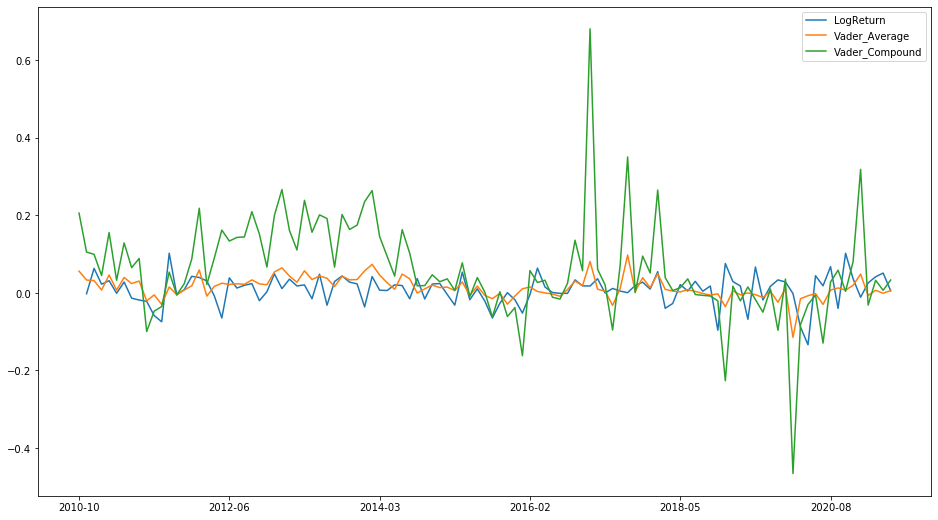

In [33]:
Granger_data_monthly[['LogReturn','Vader_Average','Vader_Compound']].plot(legend=True, figsize=(16,9))

In [56]:
corr = Granger_data_daily[["Vader_Compound","Vader_Average","WNSentiment","HVSentiment","LMSentiment","LogReturn"]].corr()
corr.style.background_gradient(cmap='coolwarm')

,Vader_Compound,Vader_Average,WNSentiment,HVSentiment,LMSentiment,LogReturn
Vader_Compound,1.000000,0.784458,0.403164,0.510469,0.504660,-0.005682
Vader_Average,0.784458,1.000000,0.491661,0.445501,0.428153,0.003532
WNSentiment,0.403164,0.491661,1.000000,0.322722,0.283764,-0.000352
HVSentiment,0.510469,0.445501,0.322722,1.000000,0.549956,0.025830
LMSentiment,0.504660,0.428153,0.283764,0.549956,1.000000,0.006965
LogReturn,-0.005682,0.003532,-0.000352,0.025830,0.006965,1.000000


In [57]:
pvals = [] 
for col in ["Vader_Compound","Vader_Average","WNSentiment","HVSentiment","LMSentiment"]:
    pvals.append(scipy.stats.linregress(Granger_data_daily['LogReturn'][1:], Granger_data_daily[col][1:].dropna())[3])
corr_signif = pd.DataFrame(pvals,columns = ['p-value']
                           ,index = ["Vader_Compound","Vader_Average","WNSentiment","HVSentiment","LMSentiment"])
corr_signif

,p-value
Vader_Compound,0.824240
Vader_Average,0.897902
WNSentiment,0.989741
HVSentiment,0.331629
LMSentiment,0.797182


In [38]:
pvals_mnt = [] 
for col in ['Vader_Compound','Flair_Score','SentimentScoreAdj','Vader_Average']:
    pvals_mnt.append(scipy.stats.linregress(Granger_data_monthly['LogReturn'][1:], Granger_data_monthly[col][1:].dropna())[3])
corr_signif_mnt = pd.DataFrame(pvals_mnt,columns = ['p-value']
                           ,index = ['Vader_Compound','Flair_Score','SentimentScoreAdj','Vader_Average'])
corr_signif_mnt

,p-value
Vader_Compound,0.084306
Flair_Score,0.977764
SentimentScoreAdj,0.311650
Vader_Average,0.047369
